# Ejercicio Credit One
## Construcción, evaluación y predicción
#### Se puede encontrar una corta descripción en: [GitHub] (https://github.com/luquillas/EDA-Credit-One/blob/master/README.md)

In [1]:
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
import scipy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split


from sklearn import preprocessing


from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

import timeit


## Inicialización de los algoritmos que van a ser entrenados.

In [2]:
modelKN = KNeighborsClassifier()
modelSVC = SVC()
modelGNB = GaussianNB()
modelDT = DecisionTreeClassifier()

modelKNCOR = KNeighborsClassifier()
modelSVCCOR = SVC()
modelGNBCOR = GaussianNB()
modelDTCOR = DecisionTreeClassifier()

modelKNRFE = KNeighborsClassifier()
modelSVCRFE = SVC()
modelGNBRFE = GaussianNB()
modelDTRFE = DecisionTreeClassifier()


modelKNPCA = KNeighborsClassifier()
modelSVCPCA = SVC()
modelGNBPCA = GaussianNB()
modelDTPCA = DecisionTreeClassifier()



## Lectura del conjunto de datos e impresión de encabezado y primeras filas.


In [3]:
ClientesSinProcesar = pd.read_csv('defaultClients.csv',header=1)
ClientesSinProcesar.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Descripción del timpo de datos de las columnas.


In [4]:
ClientesSinProcesar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

## Preprocesamiento de los datos, entre los cambios necesarios se aplica:
* Cambio de variables enteras a categóricas
* Cambio de nombre en la variable dependiente para mayor facilidad
* Asignación de la variable dependiente y separación de variables


In [5]:
ClientesProcesados = ClientesSinProcesar.iloc[:,1:]


In [6]:
ClientesProcesados['SEX']=ClientesProcesados['SEX'].astype('category')
ClientesProcesados['EDUCATION']=ClientesProcesados['EDUCATION'].astype('category')
ClientesProcesados['MARRIAGE']=ClientesProcesados['MARRIAGE'].astype('category')

ClientesProcesados.rename(columns={"PAY_0":"PAY_1"}, inplace=True)
ClientesProcesados['PAY_1']=ClientesProcesados['PAY_1'].astype('category')
ClientesProcesados['PAY_2']=ClientesProcesados['PAY_2'].astype('category')
ClientesProcesados['PAY_3']=ClientesProcesados['PAY_3'].astype('category')
ClientesProcesados['PAY_4']=ClientesProcesados['PAY_4'].astype('category')
ClientesProcesados['PAY_5']=ClientesProcesados['PAY_5'].astype('category')
ClientesProcesados['PAY_6']=ClientesProcesados['PAY_6'].astype('category')

ClientesProcesados.rename(columns={"default payment next month":"DEFAULT"}, inplace=True)
ClientesProcesados['DEFAULT']=ClientesProcesados['DEFAULT'].astype('category')

C:\Users\jorrodro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jorrodro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jorrodro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [7]:
ClientesProcesados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_1        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [8]:
depVar=ClientesProcesados['DEFAULT']
ClientesProcesados=ClientesProcesados.iloc[:,:-1] 

## Aplicación de RFE para selección de los atributos mas importantes. Para este caso se seleccionan 4 atributos como número optimo.


In [9]:
ClientesProcesadosRFE=ClientesProcesados.copy()
rfc = DecisionTreeClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(ClientesProcesadosRFE, depVar)
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 4


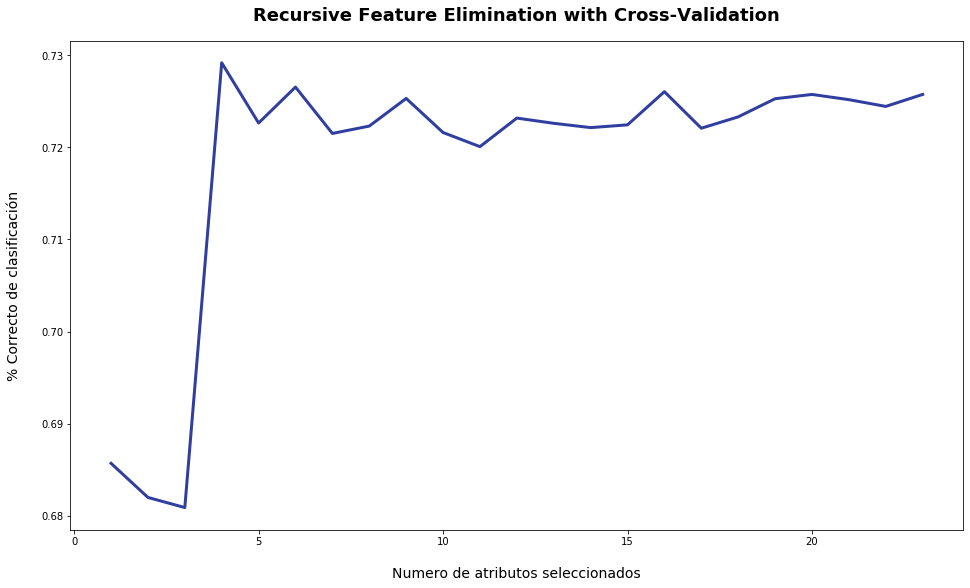

In [128]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Numero de atributos seleccionados', fontsize=14, labelpad=20)
plt.ylabel('% Correcto de clasificación', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [11]:
ClientesProcesadosRFE.drop(ClientesProcesadosRFE.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

## Muestra los atributos seleccionados por el proceso RFE de acuerdo a su importancia.


In [12]:
ClientesProcesadosRFE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
PAY_1        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT6    30000 non-null int64
dtypes: category(1), int64(3)
memory usage: 732.9 KB


## Matriz de covariancia presentada en el conjunto de datos.


In [13]:
covMat = ClientesProcesados.cov () 
print (covMat)

              LIMIT_BAL            AGE     BILL_AMT1     BILL_AMT2  \
LIMIT_BAL  1.683446e+10  173076.722569  2.727020e+09  2.570130e+09   
AGE        1.730767e+05      84.969755  3.817293e+04  3.561366e+04   
BILL_AMT1  2.727020e+09   38172.933546  5.422240e+09  4.986670e+09   
BILL_AMT2  2.570130e+09   35613.657962  4.986670e+09  5.065705e+09   
BILL_AMT3  2.548533e+09   34334.251320  4.556511e+09  4.582086e+09   
BILL_AMT4  2.453926e+09   30453.108180  4.075286e+09  4.086508e+09   
BILL_AMT5  2.331481e+09   27654.067800  3.714795e+09  3.720401e+09   
BILL_AMT6  2.243837e+09   26137.648547  3.519876e+09  3.524868e+09   
PAY_AMT1   4.195711e+08    3992.041735  1.710894e+08  3.305146e+08   
PAY_AMT2   5.333504e+08    4626.861549  1.685692e+08  1.653859e+08   
PAY_AMT3   4.801180e+08    4746.824393  2.034048e+08  1.888731e+08   
PAY_AMT4   4.131202e+08    3087.324192  1.826164e+08  1.643518e+08   
PAY_AMT5   4.305657e+08    3218.052172  1.879091e+08  1.717652e+08   
PAY_AMT6   5.065153e

## Matriz de correlación presentada en el conjunto de datos. Se encuentra correlación en entre los atributos BILL_AMT# por lo cual es necesario eliminar 5 de estos atributos


In [14]:
corrMat = ClientesProcesados.corr () 
print (corrMat)

           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.144713   0.285430   0.278314   0.283236   0.293988   
AGE         0.144713  1.000000   0.056239   0.054283   0.053710   0.051353   
BILL_AMT1   0.285430  0.056239   1.000000   0.951484   0.892279   0.860272   
BILL_AMT2   0.278314  0.054283   0.951484   1.000000   0.928326   0.892482   
BILL_AMT3   0.283236  0.053710   0.892279   0.928326   1.000000   0.923969   
BILL_AMT4   0.293988  0.051353   0.860272   0.892482   0.923969   1.000000   
BILL_AMT5   0.295562  0.049345   0.829779   0.859778   0.883910   0.940134   
BILL_AMT6   0.290389  0.047613   0.802650   0.831594   0.853320   0.900941   
PAY_AMT1    0.195236  0.026147   0.140277   0.280365   0.244335   0.233012   
PAY_AMT2    0.178408  0.021785   0.099355   0.100851   0.316936   0.207564   
PAY_AMT3    0.210167  0.029247   0.156887   0.150718   0.130011   0.300023   
PAY_AMT4    0.203242  0.021379   0.158303   0.147398   0.143405 

In [15]:
ClientesProcesadosCOR=ClientesProcesados.iloc[:,:] 
ClientesProcesadosCOR.drop("BILL_AMT1", axis=1, inplace=True)
ClientesProcesadosCOR.drop("BILL_AMT2", axis=1, inplace=True)
ClientesProcesadosCOR.drop("BILL_AMT3", axis=1, inplace=True)
ClientesProcesadosCOR.drop("BILL_AMT4", axis=1, inplace=True)
ClientesProcesadosCOR.drop("BILL_AMT5", axis=1, inplace=True)

In [16]:
ClientesProcesadosCOR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_1        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: category(9), int64(9)
memory usage: 2.3 MB


In [17]:
corrMat = ClientesProcesadosCOR.corr () 
print (corrMat)

           LIMIT_BAL       AGE  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
LIMIT_BAL   1.000000  0.144713   0.290389  0.195236  0.178408  0.210167   
AGE         0.144713  1.000000   0.047613  0.026147  0.021785  0.029247   
BILL_AMT6   0.290389  0.047613   1.000000  0.199965  0.172663  0.233770   
PAY_AMT1    0.195236  0.026147   0.199965  1.000000  0.285576  0.252191   
PAY_AMT2    0.178408  0.021785   0.172663  0.285576  1.000000  0.244770   
PAY_AMT3    0.210167  0.029247   0.233770  0.252191  0.244770  1.000000   
PAY_AMT4    0.203242  0.021379   0.250237  0.199558  0.180107  0.216325   
PAY_AMT5    0.217202  0.022850   0.307729  0.148459  0.180908  0.159214   
PAY_AMT6    0.219595  0.019478   0.115494  0.185735  0.157634  0.162740   

           PAY_AMT4  PAY_AMT5  PAY_AMT6  
LIMIT_BAL  0.203242  0.217202  0.219595  
AGE        0.021379  0.022850  0.019478  
BILL_AMT6  0.250237  0.307729  0.115494  
PAY_AMT1   0.199558  0.148459  0.185735  
PAY_AMT2   0.180107  0.180908  0.157634

## Creación de los conjunto de datos de pruebas y entrenamiento con un porcentaje 75/25.


In [18]:
x_train, x_test, y_train, y_test = train_test_split(ClientesProcesados, depVar)
x_trainCOR, x_testCOR, y_trainCOR, y_testCOR = train_test_split(ClientesProcesadosCOR, depVar)
x_trainRFE, x_testRFE, y_trainRFE, y_testRFE = train_test_split(ClientesProcesadosRFE, depVar)
x_trainPCA, x_testPCA, y_trainPCA, y_testPCA = train_test_split(ClientesProcesados, depVar)

## Elección de atributos con mayor variabilidad. Del total de 25 columnas se eligen solamente 8 y estas representan el 73.46% de varianza de los datos.


In [19]:
sc = StandardScaler() 
x_trainPCA = sc.fit_transform(x_trainPCA) 
x_testPCA = sc.transform(x_testPCA) 
pca = PCA(n_components = 8) 
  
x_trainPCA = pca.fit_transform(x_trainPCA) 
x_testPCA = pca.transform(x_testPCA) 
  
explained_variance = pca.explained_variance_ratio_ 

In [20]:
sum(explained_variance)

0.7346041601469944

In [21]:
print(x_train.shape, x_test.shape, y_train.shape,y_test.shape)
print(x_trainCOR.shape, x_testCOR.shape, y_trainCOR.shape,y_testCOR.shape)
print(x_trainRFE.shape, x_testRFE.shape, y_trainRFE.shape,y_testRFE.shape)
print(x_trainPCA.shape, x_testPCA.shape, y_trainPCA.shape,y_testPCA.shape)

(22500, 18) (7500, 18) (22500,) (7500,)
(22500, 18) (7500, 18) (22500,) (7500,)
(22500, 4) (7500, 4) (22500,) (7500,)
(22500, 8) (7500, 8) (22500,) (7500,)


## Ajuste, puntuación y predicción sobre el conjunto de entrenamiento utilizando el conjunto de datos con todos los atributos. Se evaluan 4 algoritmos distintos. 
* KNeighborsClassifier
* SVC
* GaussianNB
* DecisionTreeClassifier


In [22]:
modelSVC.fit(x_train,y_train)
SVC_prediction = modelSVC.predict(x_test)
print(accuracy_score(SVC_prediction, y_test))
print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(SVC_prediction, y_test))

0.7730666666666667
[[5798 1702]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      7500
           1       0.00      0.00      0.00         0

    accuracy                           0.77      7500
   macro avg       0.50      0.39      0.44      7500
weighted avg       1.00      0.77      0.87      7500



C:\Users\jorrodro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
modelKN.fit(x_train,y_train)
KN_prediction = modelKN.predict(x_test)
print(accuracy_score(KN_prediction, y_test))
print(confusion_matrix(KN_prediction, y_test))
print(classification_report(KN_prediction, y_test))

0.7529333333333333
[[5383 1438]
 [ 415  264]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      6821
           1       0.16      0.39      0.22       679

    accuracy                           0.75      7500
   macro avg       0.54      0.59      0.54      7500
weighted avg       0.86      0.75      0.80      7500



In [24]:
modelGNB.fit(x_train,y_train)
GNB_prediction = modelGNB.predict(x_test)
print(accuracy_score(GNB_prediction, y_test))
print(confusion_matrix(GNB_prediction, y_test))
print(classification_report(GNB_prediction, y_test))

0.37906666666666666
[[1334  193]
 [4464 1509]]
              precision    recall  f1-score   support

           0       0.23      0.87      0.36      1527
           1       0.89      0.25      0.39      5973

    accuracy                           0.38      7500
   macro avg       0.56      0.56      0.38      7500
weighted avg       0.75      0.38      0.39      7500



In [25]:
modelDT.fit(x_train,y_train)
DT_prediction = modelDT.predict(x_test)
print(accuracy_score(DT_prediction, y_test))
print(confusion_matrix(DT_prediction, y_test))
print(classification_report(DT_prediction, y_test))

0.7269333333333333
[[4723  973]
 [1075  729]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5696
           1       0.43      0.40      0.42      1804

    accuracy                           0.73      7500
   macro avg       0.62      0.62      0.62      7500
weighted avg       0.72      0.73      0.72      7500



## De acuerdo a los resultados anteriores el mejor rendimiento es ofrecido por el SVC y el rendimiento mas bajo es del método GaussianNB

## Los siguientes pasos se evaluan los métodos eliminando los atributos con menor importancia utilizando el proceso RFE.

In [26]:
modelSVCCOR.fit(x_trainCOR,y_trainCOR)
SVC_predictionCOR = modelSVCCOR.predict(x_testCOR)
print(accuracy_score(SVC_predictionCOR, y_testCOR))
print(confusion_matrix(SVC_predictionCOR, y_testCOR))
print(classification_report(SVC_predictionCOR, y_testCOR))

0.7746666666666666
[[5810 1690]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      7500
           1       0.00      0.00      0.00         0

    accuracy                           0.77      7500
   macro avg       0.50      0.39      0.44      7500
weighted avg       1.00      0.77      0.87      7500



C:\Users\jorrodro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
modelKNCOR.fit(x_trainCOR,y_trainCOR)
KN_predictionCOR = modelKNCOR.predict(x_testCOR)
print(accuracy_score(KN_predictionCOR, y_testCOR))
print(confusion_matrix(KN_predictionCOR, y_testCOR))
print(classification_report(KN_predictionCOR, y_testCOR))

0.7521333333333333
[[5360 1409]
 [ 450  281]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6769
           1       0.17      0.38      0.23       731

    accuracy                           0.75      7500
   macro avg       0.54      0.59      0.54      7500
weighted avg       0.85      0.75      0.79      7500



In [28]:
modelGNBCOR.fit(x_trainCOR,y_trainCOR)
GNB_predictionCOR = modelGNBCOR.predict(x_testCOR)
print(accuracy_score(GNB_predictionCOR, y_testCOR))
print(confusion_matrix(GNB_predictionCOR, y_testCOR))
print(classification_report(GNB_predictionCOR, y_testCOR))

0.38333333333333336
[[1379  194]
 [4431 1496]]
              precision    recall  f1-score   support

           0       0.24      0.88      0.37      1573
           1       0.89      0.25      0.39      5927

    accuracy                           0.38      7500
   macro avg       0.56      0.56      0.38      7500
weighted avg       0.75      0.38      0.39      7500



In [29]:
modelDTCOR.fit(x_trainCOR,y_trainCOR)
DT_predictionCOR = modelDTCOR.predict(x_testCOR)
print(accuracy_score(DT_predictionCOR, y_testCOR))
print(confusion_matrix(DT_predictionCOR, y_testCOR))
print(classification_report(DT_predictionCOR, y_testCOR))

0.7306666666666667
[[4759  969]
 [1051  721]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      5728
           1       0.43      0.41      0.42      1772

    accuracy                           0.73      7500
   macro avg       0.62      0.62      0.62      7500
weighted avg       0.73      0.73      0.73      7500



## De acuerdo a los resultados anteriores el mejor rendimiento es ofrecido por el SVC y el rendimiento mas bajo es del método GaussianNB

## Los siguientes pasos se evaluan los métodos eliminando los atributos que presentan correlación.

In [30]:
modelSVCRFE.fit(x_trainRFE,y_trainRFE)
SVC_predictionRFE = modelSVCRFE.predict(x_testRFE)
print(accuracy_score(SVC_predictionRFE, y_testRFE))
print(confusion_matrix(SVC_predictionRFE, y_testRFE))
print(classification_report(SVC_predictionRFE, y_testRFE))

0.7830666666666667
[[5871 1625]
 [   2    2]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      7496
           1       0.00      0.50      0.00         4

    accuracy                           0.78      7500
   macro avg       0.50      0.64      0.44      7500
weighted avg       1.00      0.78      0.88      7500



In [31]:
modelKNRFE.fit(x_trainRFE,y_trainRFE)
KN_predictionRFE = modelKNRFE.predict(x_testRFE)
print(accuracy_score(KN_predictionRFE, y_testRFE))
print(confusion_matrix(KN_predictionRFE, y_testRFE))
print(classification_report(KN_predictionRFE, y_testRFE))

0.7576
[[5456 1401]
 [ 417  226]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      6857
           1       0.14      0.35      0.20       643

    accuracy                           0.76      7500
   macro avg       0.53      0.57      0.53      7500
weighted avg       0.86      0.76      0.80      7500



In [32]:
modelGNBRFE.fit(x_trainRFE,y_trainRFE)
GNB_predictionRFE = modelGNBRFE.predict(x_testRFE)
print(accuracy_score(GNB_predictionRFE, y_testRFE))
print(confusion_matrix(GNB_predictionRFE, y_testRFE))
print(classification_report(GNB_predictionRFE, y_testRFE))

0.7830666666666667
[[5872 1626]
 [   1    1]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      7498
           1       0.00      0.50      0.00         2

    accuracy                           0.78      7500
   macro avg       0.50      0.64      0.44      7500
weighted avg       1.00      0.78      0.88      7500



In [129]:
modelDTRFE.fit(x_trainRFE,y_trainRFE)
DT_predictionRFE = modelDTRFE.predict(x_testRFE)
print(accuracy_score(DT_predictionRFE, y_testRFE))
print(confusion_matrix(DT_predictionRFE, y_testRFE))
print(classification_report(DT_predictionRFE, y_testRFE))

0.7244
[[4857 1051]
 [1016  576]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5908
           1       0.35      0.36      0.36      1592

    accuracy                           0.72      7500
   macro avg       0.59      0.59      0.59      7500
weighted avg       0.73      0.72      0.73      7500



## De acuerdo a los resultados anteriores el mejor rendimiento es ofrecido por el SVC y el  método GaussianNB, mientras que el resultado mas bajo lo presenta el DecisionTreeClassifier

## Finalmente se utilizan los 4 algoritmos con el conjunto de datos dejando solo los atributos con mayor varianza.

In [34]:
modelSVCPCA.fit(x_trainPCA,y_trainPCA)
SVC_predictionPCA = modelSVCPCA.predict(x_testPCA)
print(accuracy_score(SVC_predictionPCA, y_testPCA))
print(confusion_matrix(SVC_predictionPCA, y_testPCA))
print(classification_report(SVC_predictionPCA, y_testPCA))

0.808
[[5639 1210]
 [ 230  421]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      6849
           1       0.26      0.65      0.37       651

    accuracy                           0.81      7500
   macro avg       0.61      0.74      0.63      7500
weighted avg       0.90      0.81      0.84      7500



In [35]:
modelKNPCA.fit(x_trainPCA,y_trainPCA)
KN_predictionPCA = modelKNPCA.predict(x_testPCA)
print(accuracy_score(KN_predictionPCA, y_testPCA))
print(confusion_matrix(KN_predictionPCA, y_testPCA))
print(classification_report(KN_predictionPCA, y_testPCA))

0.7905333333333333
[[5406 1108]
 [ 463  523]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      6514
           1       0.32      0.53      0.40       986

    accuracy                           0.79      7500
   macro avg       0.62      0.68      0.64      7500
weighted avg       0.84      0.79      0.81      7500



In [36]:
modelGNBPCA.fit(x_trainPCA,y_trainPCA)
GNB_predictionPCA = modelGNBPCA.predict(x_testPCA)
print(accuracy_score(GNB_predictionPCA, y_testPCA))
print(confusion_matrix(GNB_predictionPCA, y_testPCA))
print(classification_report(GNB_predictionPCA, y_testPCA))

0.792
[[5278  969]
 [ 591  662]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      6247
           1       0.41      0.53      0.46      1253

    accuracy                           0.79      7500
   macro avg       0.65      0.69      0.67      7500
weighted avg       0.82      0.79      0.80      7500



In [37]:
modelDTPCA.fit(x_trainPCA,y_trainPCA)
DT_predictionPCA = modelDTPCA.predict(x_testPCA)
print(accuracy_score(DT_predictionPCA, y_testPCA))
print(confusion_matrix(DT_predictionPCA, y_testPCA))
print(classification_report(DT_predictionPCA, y_testPCA))

0.7165333333333334
[[4739  996]
 [1130  635]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5735
           1       0.39      0.36      0.37      1765

    accuracy                           0.72      7500
   macro avg       0.60      0.59      0.60      7500
weighted avg       0.71      0.72      0.71      7500



## De acuerdo a los resultados anteriores el mejor rendimiento es ofrecido por el SVC y el  método GaussianNB, mientras que el resultado mas bajo lo presenta el DecisionTreeClassifier

## Se realiza optimización sobre los dos métodos con mejor rendimiento, ajustando los parametros C y gamma para el SVC y var_smoothing y priors para el algoritmo GaussianNB. 
## El mejor resultado es obtenido con SVC utilizando gamma='auto' y C=3.3

In [127]:
modelSVCPCA = SVC(C=3.2,gamma='auto')
modelSVCPCA.fit(x_trainPCA,y_trainPCA)
SVC_predictionPCA = modelSVCPCA.predict(x_testPCA)
print(accuracy_score(SVC_predictionPCA, y_testPCA))
print(confusion_matrix(SVC_predictionPCA, y_testPCA))
print(classification_report(SVC_predictionPCA, y_testPCA))

0.8109333333333333
[[5618 1167]
 [ 251  464]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      6785
           1       0.28      0.65      0.40       715

    accuracy                           0.81      7500
   macro avg       0.62      0.74      0.64      7500
weighted avg       0.89      0.81      0.84      7500



In [102]:
modelGNBPCA = GaussianNB(var_smoothing=0.131,priors=[0.759,0.241])
modelGNBPCA.fit(x_trainPCA,y_trainPCA)
GNB_predictionPCA = modelGNBPCA.predict(x_testPCA)
print(accuracy_score(GNB_predictionPCA, y_testPCA))
print(confusion_matrix(GNB_predictionPCA, y_testPCA))
print(classification_report(GNB_predictionPCA, y_testPCA))

0.808
[[5547 1118]
 [ 322  513]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      6665
           1       0.31      0.61      0.42       835

    accuracy                           0.81      7500
   macro avg       0.63      0.72      0.65      7500
weighted avg       0.87      0.81      0.83      7500



## Se intenta realizar una búsqueda automática de parámetros óptimos para el algoritmo SVC pero duración es extrema por lo que se ópta por realizalo de forma manual.